In [1]:
import numpy as np
from helpers import *
from cross_validation import *
import os
import sys
import random
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label

from keras.models import Model, load_model
from keras.layers import Input
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from skimage import transform

import tensorflow as tf

Using TensorFlow backend.


In [2]:

IMG_WIDTH = 400
IMG_HEIGHT = 400
IMG_CHANNELS = 3
TRAIN_PATH = 'C:/Users/123/stage/stage1_train/'
TEST_PATH = 'C:/Users/123/stage/stage1_test/'

warnings.filterwarnings('ignore', category=UserWarning, module='skimage')
seed = 42
random.seed = seed
np.random.seed = seed

In [3]:
train_ids = next(os.walk(TRAIN_PATH))[1]
test_ids = next(os.walk(TEST_PATH))[1]

In [4]:
#  Get and resize train images and masks
X_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_ids), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
print('Getting and resizing train images and masks ... ')
sys.stdout.flush()
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    path = TRAIN_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img
    mask = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)
    for mask_file in next(os.walk(path + '/masks/'))[2]:
        mask_ = imread(path + '/masks/' + mask_file)
        mask_ = np.expand_dims(resize(mask_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', 
                                      preserve_range=True), axis=-1)
        mask = np.maximum(mask, mask_)
    Y_train[n] = mask

# Get and resize test images
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
sizes_test = []
print('Getting and resizing test images ... ')
sys.stdout.flush()
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    path = TEST_PATH + id_
    img = imread(path + '/images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img

print('Done!')

Getting and resizing train images and masks ... 


100%|████████████████████████████████████████████████████████████████████████████████| 670/670 [05:55<00:00,  1.88it/s]


Getting and resizing test images ... 


100%|██████████████████████████████████████████████████████████████████████████████████| 65/65 [00:02<00:00, 25.06it/s]


Done!


In [5]:
X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)

In [6]:
Y_train = Y_train.reshape(670, 400, 400)
print(Y_train.shape)


(670, 400, 400)


In [7]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import regularizers
from keras import initializers
from skimage import io, transform,filters
import pandas as pd
import matplotlib.image as pimg
import seaborn as sb   
import glob
from keras.models import model_from_json  
# from sklearn import metrics  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import itertools
import time
from keras.utils import plot_model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as pimg
import seaborn as sb         # 一个构建在matplotlib上的绘画模块，支持numpy,pandas等数据结构
%matplotlib inline

import time
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix     # 混淆矩阵
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from keras.optimizers import Adam
import itertools
#  keras
from keras.utils import to_categorical         #数字标签转化成one-hot编码
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import EarlyStopping
from keras.callbacks import History

In [85]:
model = Sequential()
model.add(Conv2D(25, (4, 4), padding='same',
                 input_shape=(72, 72, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(50, (5, 5)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(80, (6, 6)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))
model.summary()

opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 72, 72, 25)        1225      
_________________________________________________________________
activation_12 (Activation)   (None, 72, 72, 25)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 72, 72, 25)        100       
_________________________________________________________________
dropout_6 (Dropout)          (None, 72, 72, 25)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 25)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 50)        31300     
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 50)        0         
__________

In [9]:
patch_size = 2
window_size = 72
padding = (window_size - patch_size) // 2
X=X_train
Y=Y_train
X_new = np.empty((X.shape[0],
                         X.shape[1] + 2*padding, X.shape[2] + 2*padding,
                         X.shape[3]))
Y_new = np.empty((Y.shape[0],
                 Y.shape[1] + 2*padding, Y.shape[2] + 2*padding))
for i in range(X.shape[0]):
    print(X[i].shape)
    X_new[i] = pad_image(X[i], padding)
    print(X_new[i].shape)
    print(Y[i].shape)
    Y_new[i] = pad_image(Y[i], padding)
X = X_new
Y = Y_new
batch_size = 64
nb_classes = 2
# nb_epoch = 2
window_size = 72
# samples_per_epoch = X.shape[0]*X.shape[1]*X.shape[2]//256


(400, 400, 3)
(470, 470, 3)
(400, 400)
(400, 400, 3)
(470, 470, 3)
(400, 400)
(400, 400, 3)
(470, 470, 3)
(400, 400)
(400, 400, 3)
(470, 470, 3)
(400, 400)
(400, 400, 3)
(470, 470, 3)
(400, 400)
(400, 400, 3)
(470, 470, 3)
(400, 400)
(400, 400, 3)
(470, 470, 3)
(400, 400)
(400, 400, 3)
(470, 470, 3)
(400, 400)
(400, 400, 3)
(470, 470, 3)
(400, 400)
(400, 400, 3)
(470, 470, 3)
(400, 400)
(400, 400, 3)
(470, 470, 3)
(400, 400)
(400, 400, 3)
(470, 470, 3)
(400, 400)
(400, 400, 3)
(470, 470, 3)
(400, 400)
(400, 400, 3)
(470, 470, 3)
(400, 400)
(400, 400, 3)
(470, 470, 3)
(400, 400)
(400, 400, 3)
(470, 470, 3)
(400, 400)
(400, 400, 3)
(470, 470, 3)
(400, 400)
(400, 400, 3)
(470, 470, 3)
(400, 400)
(400, 400, 3)
(470, 470, 3)
(400, 400)
(400, 400, 3)
(470, 470, 3)
(400, 400)
(400, 400, 3)
(470, 470, 3)
(400, 400)
(400, 400, 3)
(470, 470, 3)
(400, 400)
(400, 400, 3)
(470, 470, 3)
(400, 400)
(400, 400, 3)
(470, 470, 3)
(400, 400)
(400, 400, 3)
(470, 470, 3)
(400, 400)
(400, 400, 3)
(470, 470, 

In [87]:
nb_epoch = 1
samples_per_epoch = 20000
print(samples_per_epoch)

20000


In [88]:
def generate_minibatch():
    while 1:
        X_batch = np.empty((batch_size, window_size, window_size, 3))
        Y_batch = np.empty((batch_size, 2))
        for i in range(batch_size):
        
            idx = np.random.choice(X.shape[0])
            shape = X[idx].shape
#             print(shape)
#             print(window_size//2)
#             print(shape[0] - window_size//2)
            center = np.random.randint(window_size//2, shape[0] - window_size//2, 2)
            sub_image = X[idx][center[0]-window_size//2:center[0]+window_size//2,
                               center[1]-window_size//2:center[1]+window_size//2]
            gt_sub_image = Y[idx][center[0]-patch_size//2:center[0]+patch_size//2,
                                  center[1]-patch_size//2:center[1]+patch_size//2]
            threshold = 0.25
            label = (np.array([np.mean(gt_sub_image)]) > threshold) * 1

           
            if np.random.choice(2) == 0:
                sub_image = np.flipud(sub_image)
            if np.random.choice(2) == 0:
                sub_image = np.fliplr(sub_image)


            num_rot = np.random.choice(4)
            sub_image = np.rot90(sub_image, num_rot)
            label = keras.utils.to_categorical(label, nb_classes)
            X_batch[i] = sub_image
            Y_batch[i] = label

        if K.image_dim_ordering() == 'th':
            X_batch = np.rollaxis(X_batch, 3, 1)
#             print(1)
        yield (X_batch, Y_batch)

lr_callback = ReduceLROnPlateau(monitor='acc', factor=0.5, patience=5,
                                verbose=1, mode='auto', epsilon=0.0001, cooldown=0, min_lr=0)
stop_callback = EarlyStopping(monitor='acc', min_delta=0.0001, patience=11, verbose=1, mode='auto')

model.fit_generator(generate_minibatch(),samples_per_epoch=samples_per_epoch,nb_epoch=nb_epoch,verbose=1,
                    callbacks=[lr_callback, stop_callback])

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:43: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:43: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., callbacks=[<keras.ca..., verbose=1, epochs=1, steps_per_epoch=20000)`


Epoch 1/1
20000/20000 [==============================] - 1194s - loss: 0.0997 - acc: 0.9638  


In [89]:
model.save('saved1_weights.h5')

In [90]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import os,sys
from PIL import Image
import cv2

In [91]:
def load_image(infilename):
    data = cv2.imread(infilename)
    return data

In [92]:
def pad_image(data, padding):
    if len(data.shape) < 3:
        data = np.lib.pad(data, ((padding, padding), (padding, padding)), 'reflect')
    else:
        data = np.lib.pad(data, ((padding, padding), (padding, padding), (0,0)), 'reflect')
    return data

In [93]:
def img_float_to_uint8(img):
    rimg = img - np.min(img)
    rimg = (rimg / np.max(rimg) * 255).round().astype(np.uint8)
    return rimg

In [94]:
def concatenate_images(img, gt_img):
    nChannels = len(gt_img.shape)
    w = gt_img.shape[0]
    h = gt_img.shape[1]
    if nChannels == 3:
        cimg = np.concatenate((img, gt_img), axis=1)
    else:
        gt_img_3c = np.zeros((w, h, 3), dtype=np.uint8)
        gt_img8 = img_float_to_uint8(gt_img)
        gt_img_3c[:,:,0] = gt_img8
        gt_img_3c[:,:,1] = gt_img8
        gt_img_3c[:,:,2] = gt_img8
        img8 = img_float_to_uint8(img)
        cimg = np.concatenate((img8, gt_img_3c), axis=1)
    return cimg

In [95]:
def img_crop(im, w, h, stride, ext):
    list_patches = []
    imgwidth = im.shape[0]
    imgheight = im.shape[1]
    is_2d = len(im.shape) < 3
    if not is_2d:
        im = np.lib.pad(im, ((ext, ext), (ext, ext), (0,0)), 'reflect')
    for i in range(ext,imgheight+ext,stride):
        for j in range(ext,imgwidth+ext,stride):
            if is_2d:
                im_patch = im[j:j+w, i:i+h]
            else:
                im_patch = im[j:j+w, i:i+h, :]
                im_patch = im[j-ext:j+w+ext, i-ext:i+h+ext, :]
            list_patches.append(im_patch)
    return list_patches

In [96]:
def extract_img_features(filename, stride):
    img = load_image(filename)
    img_patches = img_crop(img, patch_size, patch_size, stride, padding)
    X = np.asarray([img_patches[i] for i in range(len(img_patches))])
    return X

In [97]:
patch_size = 2
window_size = 72
padding = (window_size - patch_size) // 2
stride = 2

In [98]:
def label_to_img(imgwidth, imgheight, w, h, labels, stride):
    im = np.zeros([imgwidth, imgheight])
    idx = 0
    for i in range(0,imgheight,stride):
        for j in range(0,imgwidth,stride):
            im[j:j+w, i:i+h] = labels[idx]
            idx = idx + 1
    return im

In [99]:
def make_img_overlay(img, predicted_img):
    w = img.shape[0]
    h = img.shape[1]
    color_mask = np.zeros((w, h, 3), dtype=np.uint8)
    color_mask[:,:,0] = predicted_img*255
    img8 = img_float_to_uint8(img)
    background = Image.fromarray(img8, 'RGB').convert("RGBA")
    overlay = Image.fromarray(color_mask, 'RGB').convert("RGBA")
    new_img = Image.blend(background, overlay, 0.7)
    return new_img

In [100]:
from keras.models import Model, load_model
model = load_model('saved1_weights.h5')

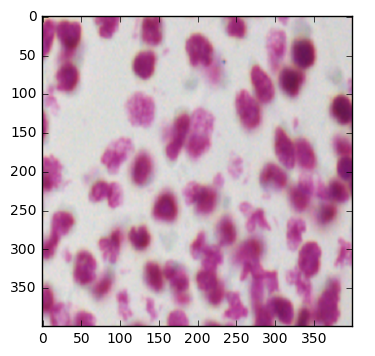

(400, 400, 3)


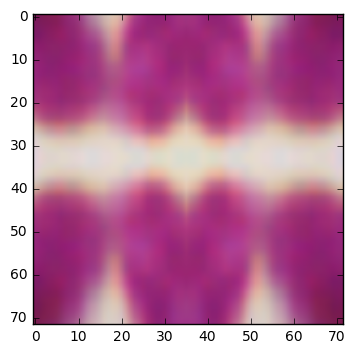

40000
(40000, 72, 72, 3)
(40000, 72, 72, 3)
[[9.9373263e-01 6.2673478e-03]
 [9.8254240e-01 1.7457660e-02]
 [8.3683699e-01 1.6316305e-01]
 ...
 [9.9978966e-01 2.1030454e-04]
 [9.9977475e-01 2.2529495e-04]
 [9.9973077e-01 2.6919052e-04]]
[False False False ... False False False]


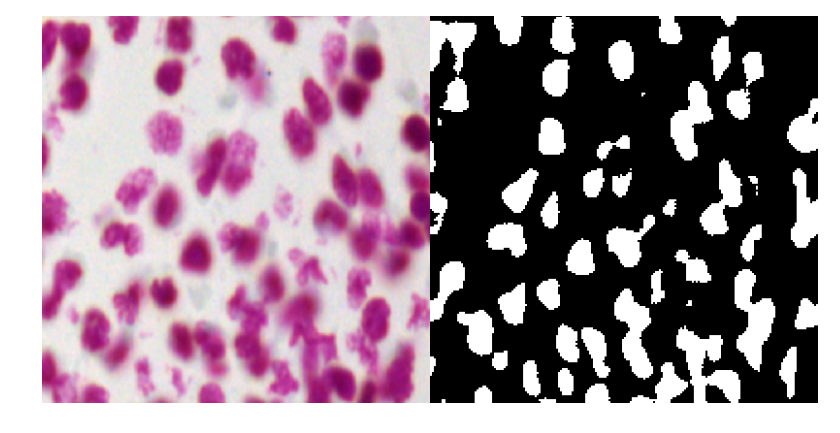

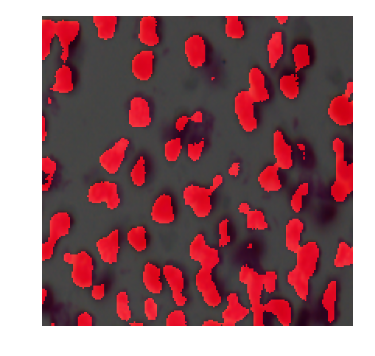

In [103]:
img_idx = 1

direc  = "C:/Users/123/Desktop/ExampleHuman/ExampleHuman/images/45.png"


img = load_image(direc)
plt.imshow(img)
plt.show()
print(img.shape)
img_patches = img_crop(img, patch_size, patch_size, stride, padding)
plt.imshow(img_patches[1])
plt.show()
print(len(img_patches))
# print(img_patches)
# print(np.asarray(img_patches[3]).shape)
a = []
for i in range(len(img_patches)):
    a.append(img_patches[i])
# print(a)
Xi = np.asarray(a)
print(Xi.shape)

# Xi = extract_img_features(direc, stride)
print(Xi.shape)
if K.image_dim_ordering() == 'th':
    Xi = np.rollaxis(Xi, 3, 1)
Zi = model.predict(Xi)
print(Zi)
Zi = Zi[:,0] < Zi[:,1]
print(Zi)
img_ = load_image(direc)
w = img_.shape[0]
h = img_.shape[1]

predicted_im = label_to_img(w, h, patch_size, patch_size, Zi, stride)
cimg = concatenate_images(img_, predicted_im)
fig1 = plt.figure(figsize=(10, 10))
plt.imshow(cimg, cmap='Greys_r')
plt.axis('off')
plt.show()
new_img = make_img_overlay(img_, predicted_im)
plt.imshow(new_img)
plt.axis('off')
plt.show()